# Titanic dataset with Naive Bayes
### Even if I saw that some values were non-independent

In [1]:
# Init and data loading

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(123)
tf.set_random_seed(123)

from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adadelta, Adam

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Helpers

In [5]:
def clean_data(frame, has_solution=True):
    frame = frame \
    .drop(columns=['Name', 'Ticket',]) \
    .assign(
        Sex=lambda x: x['Sex'].map({ 'male': 0, 'female': 1 }),
        Cabin=lambda x: int(isinstance(x['Cabin'], str))
    ) \
    .apply(pd.to_numeric, errors='ignore') \
    .fillna(df.mean())
    
    frame = pd.get_dummies(frame, columns=['Embarked'])
    
    return  (
        (frame.drop(columns='Survived'), frame['Survived']) 
        if has_solution else
        (frame, None)
    )

def plot_training(history):
    epoch_list = list(range(1, len(history.history['acc']) + 1))
    
    plt.figure(figsize=(12, 8))
    plt.plot(epoch_list, history.history['acc'])
    plt.legend(('Training Accuracy'))

    plt.show()

In [6]:
# Model definition and training

In [7]:
model = Sequential()

model.add(Dense(11, activation='sigmoid', input_shape=(11,)))
model.add(Dense(1, activation='relu'))

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

early_stopper = EarlyStopping(monitor='acc', patience=50, mode='max')

In [8]:
X, y = clean_data(df)

train_history = model.fit(X, y, batch_size=150, epochs=1000, verbose=False, callbacks=[])

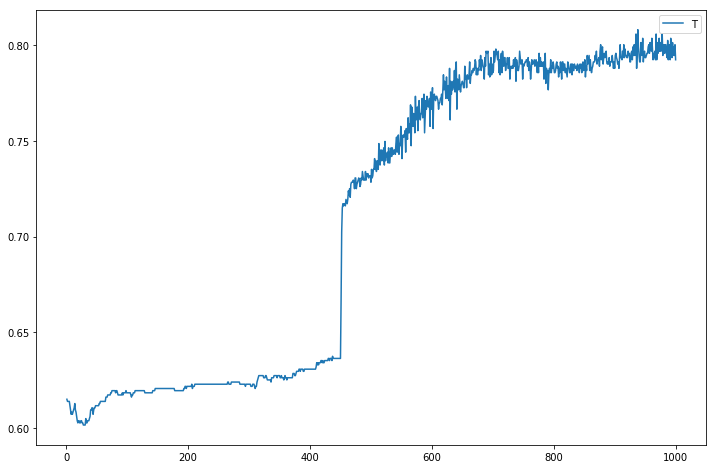

In [9]:
plot_training(train_history)

In [10]:
# Solving and Data Export

In [11]:
test_X, _ = clean_data(df_test, False)

In [12]:
df_final = pd.DataFrame(
    data={
        'PassengerId': df_test['PassengerId'],
        'Survived': [1 if p >= 0.5 else 0 for p in model.predict(test_X)]
    }
)

df_final.to_csv('titanic_result_shallow_nn.csv', index=False)

In [13]:
# Try with a deeper network

In [14]:
deep_model = Sequential()

deep_model.add(Dense(22, activation='tanh', input_shape=(11,)))
deep_model.add(Dense(66, activation='tanh'))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(1, activation='relu'))

deep_model.compile(
    loss='binary_crossentropy',
    optimizer=Adadelta(),
    metrics=['accuracy']
)

In [ ]:
X, y = clean_data(df)

deep_train_history = deep_model.fit(X, y, batch_size=150, epochs=1000, verbose=False, callbacks=[])

In [ ]:
plot_training(deep_train_history)

In [ ]:
test_X, _ = clean_data(df_test, False)
df_deep_final = pd.DataFrame(
    data={
        'PassengerId': df_test['PassengerId'],
        'Survived': [1 if p >= 0.5 else 0 for p in deep_model.predict(test_X)]
    }
)

df_deep_final.to_csv('titanic_result_deep_nn.csv', index=False)